In [35]:

import numpy as np
from rdkit.Chem import MolFromSmiles
from rdkit import RDLogger
from scipy.sparse import csgraph, csr_matrix

valid_atomic_nums = [6, 8, 7, 17, 16, 9, 35, 15, 53, 14, 11, 33, 80, 50, 5, 20, 19, 30, 26, 34, 13, 29, 12, 82, 24, 27, 1, 28, 56, 78, 25, 51, "ukn"]
valid_bond_types = ["SINGLE", "DOUBLE", "TRIPLE", "AROMATIC", "ukn"]

def safe_index(l, e):
    """
    Return index of element e in list l. If e is not present, return the last index
    """
    try:
        return l.index(e)
    except:
        return len(l) - 1


def smiles2graph(smiles, max_size=32):
    RDLogger.DisableLog('rdApp.*')
    mol = MolFromSmiles(smiles)
    if mol is None:
        return None
    node_labels = []
    for atom in mol.GetAtoms():
        node_labels.append(safe_index(valid_atomic_nums, atom.GetAtomicNum()))
    node_labels = np.array(node_labels, dtype=np.uint8)
    size = len(node_labels)
    
    if size > max_size:
        return None
    
    edges_i = []
    edges_j = []
    edges_labels = []

    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        bondtype = str(bond.GetBondType())
        
        edges_i.append(i)
        edges_j.append(j)
        edges_i.append(j)
        edges_j.append(i)

        edges_labels.append(safe_index(valid_bond_types, bondtype)+1)
        edges_labels.append(safe_index(valid_bond_types, bondtype)+1)

    adjacency_matrix = csr_matrix((np.ones(len(edges_i)), (edges_i, edges_j)), shape=(size,size))
    edges_labels = csr_matrix((np.array(edges_labels, dtype=np.uint), (edges_i, edges_j)), shape=(size,size))
    SP_matrix = csgraph.shortest_path(adjacency_matrix, directed=False, unweighted=True)
    SP_matrix = SP_matrix.astype(np.uint8)

    graph = {
        "node_labels": node_labels,
        "adjacency_matrix": adjacency_matrix,
        "edges_labels": edges_labels,
        "SP_matrix": SP_matrix
    }

    return graph

In [33]:
import matplotlib.pyplot as plt
from rdkit.Chem import Draw

def plot_smile(smiles):
    mol = MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    plt.imshow(img)
    plt.show()

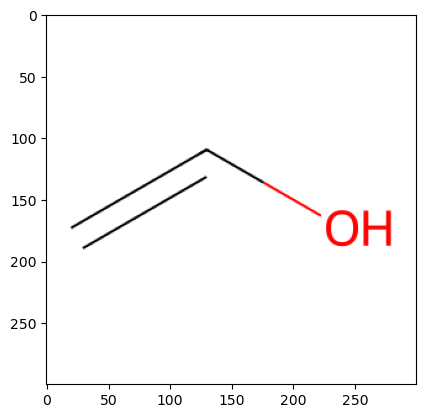

Node Labels: [0 0 1]
Adjacency Matrix:
 [[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]
Edges Labels:
 [[0 2 0]
 [2 0 1]
 [0 1 0]]
Shortest Path Matrix:
 [[0 1 2]
 [1 0 1]
 [2 1 0]]


In [34]:
smiles = 'C=CO'

plot_smile(smiles)

graph = smiles2graph(smiles)

node_labels = graph["node_labels"]
adjacency_matrix = graph["adjacency_matrix"]
edges_labels = graph["edges_labels"]
SP_matrix = graph["SP_matrix"]

print("Node Labels:", node_labels)
print("Adjacency Matrix:\n", adjacency_matrix.toarray())
print("Edges Labels:\n", edges_labels.toarray())
print("Shortest Path Matrix:\n", SP_matrix)


In [40]:
list = [6, 8, 7, 17, 16, 9, 35, 15, 53, 14, 11, 33, 80, 50, 5, 20, 19, 30, 26, 34, 13, 29, 12, 82, 24, 27, 1, 28, 56, 78, 25, 51, "ukn"]
string = str(list)
list2 = eval(string)
list2[0] + 1

7